Oil and gas development projects need production forecasts for planning purposes and to understand the economic viability of each project. Sometimes, especially in the exploration and appraisal stages, it is necessary to develop a range of production forecasts for a project based on very limited data, often in the absence of flow information for that particular field.

Some Conventional Methods like DCA are used to provide deterministic estimates for future performance and remaining reserves. But several assumptions and restrictions apply, and the deterministic prediction of future declines is often far from actual production trends, so it’s not an actual indication of true reserves.

By employing machine Learning, we have the opportunity of automating the entire modeling and forecasting process, we try to use a different approach to predict a single three years cumulative oil production, where the computer learns purely based on data

There are several attributes that would describe a well like the location, completion, production, and geological features.
For this project, we have considered the following features of the well:
* LATERAL_LENGTH_BLEND   
* PROP_PER_FOOT                  
* WATER_PER_FOOT
* GOR_30
* GOR_60			
* GOR_90
* LatWGS84	
* LonWGS84
* BottomHoleLongitude
* BottomHoleLatitude 

After the peak month, an oil well starts in the decline phase, which extends throughout its remaining lifetime. Throughout the project, we only consider the decline phase. All statistics, visualizations, or forecasts only deal with the decline phase, and the pre-peak months is completely removed in the pre-processing phase.

## Workflow

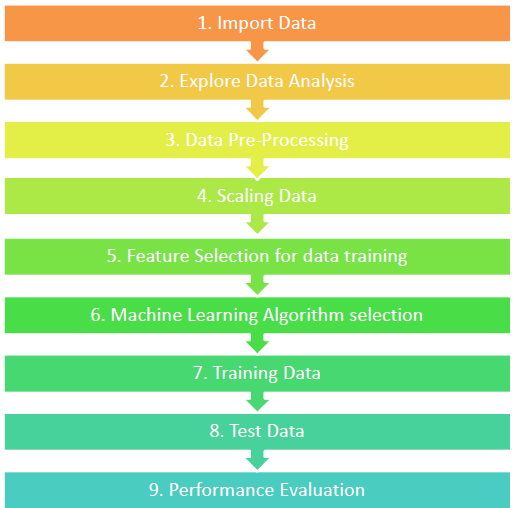

To avoid obscureness, we have embraced a modular style of programming where all of our data preprocessing functions(processes for data cleaning and feature engineering) is in a separate .py file which would act as a module in the preprocessing stage.

## 1. Importing Data

Firstly we import all the necessary functions for the workflow
* [Numpy](https://numpy.org/) - NumPy (Numerical Python) is the fundamental package for numerical computation in Python; it provides high-performance multidimensional objects called arrays and tools for working with them.
* [Pandas](https://pandas.pydata.org/) - Pandas provides fast, flexible data structures, such as data frame CDs, which are designed to work with structured data very easily and intuitively. it is heavily used for data analysis and cleaning.
* [Matplotlib](https://matplotlib.org/) - Matplotlib is extensively used for data visualization. It also provides an object-oriented API, which can be used to embed those plots into applications.
* [Scikit-learn](https://scikit-learn.org/stable/) - Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, and k-means, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
* [TensorFlow](https://www.tensorflow.org/) - TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks
* [Latty](#) - Latty is a prebuilt custom function created to handle the preprocessing steps of feature engineering on the training data

In [1]:
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
import pandas as pd #Python data analysis library
from pandas.plotting import scatter_matrix
import numpy as np #Python library for scientific computing
from sklearn.model_selection import train_test_split #Python module for evaluating models performance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,mean_absolute_error

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import tensorflow as tf
from tensorflow.data import Dataset
import sys
sys.path.append('C:\\Users\\LENOVO\\Documents\\Books\\DSA\\code\\func_')
from func_.latty import Preprocessing
import warnings
warnings.filterwarnings(action='ignore')
tf.keras.backend.clear_session()

In [3]:
#Instantiate the Preprocessing Module
preprocess = Preprocessing()

latty instantiated


In [4]:
ihs_data, harmony_data, production_test = preprocess.read_data_()

The preprocess.read_data_ reads the datasets from our local directory into three different pandas [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) 

## Data Profiling/Exploratory Data Analysis

As is mandatory for every machine learning process, we perform some Exploratory Data analysis on the datasets to understand the [Data Quality](https://en.wikipedia.org/wiki/Data_quality) issues, if there are any. Exploratory Data Analysis refers to the process of examining, analyzing, reviewing, and summarizing data sets to gain insight into the quality of data

#### [Kaggle](https://www.kaggle.com/)
Kaggle is an online community of data scientists and machine learning engineers. Kaggle allows users to find datasets they want to use in building AI models, publish datasets, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges. We have made use of the [Raisa well](https://www.kaggle.com/competitions/datascienceatraisa/data) for the prediction of the three years cumulative production of a well given the specific features of a well.

In [5]:
ihs_data.head(2)

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude
0,33105037530000,2014-09-10,2014-12-31,2015-05-05,2015-03-01 00:00:00.000,CONTINENTAL RESOURCES INCORPORATED,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,WILLIAMS,48.227596,-103.299600,48.2546,-103.29997
1,33105032020000,2013-09-09,2013-11-02,2014-04-28,2014-04-01 00:00:00.000,CONTINENTAL RESOURCES INCORPORATED,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,WILLIAMS,48.230954,-103.189754,48.1983,-103.19195


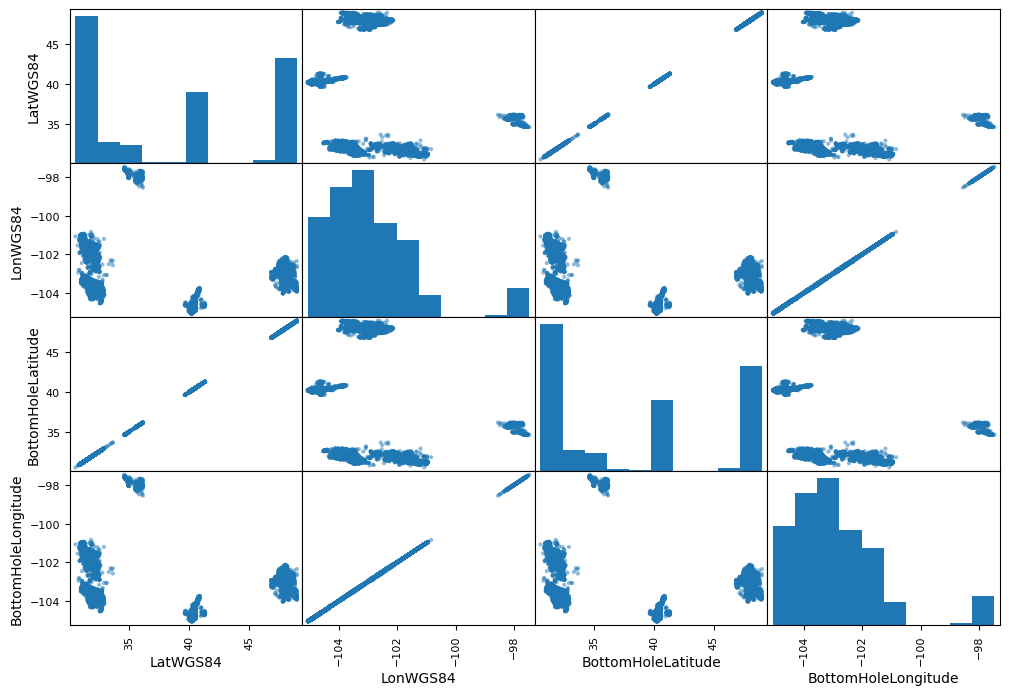

In [6]:
attributes = ['LatWGS84','LonWGS84','BottomHoleLatitude','BottomHoleLongitude']
scatter_matrix(ihs_data[attributes], figsize=(12, 8))
plt.show()

#### The API Feature represents each well, so we can count the number of unique wells present in the data

In [7]:
ihs_data['API'].nunique()

8930

In [8]:
len(ihs_data['API'])

9224

#### The length of the IHS Data does not correspond to the number of unique wells, this indicates the presence of duplicate values as we will see on further data profiling from the other dataset

In [9]:
# A sample
ihs_data[ihs_data['API'] == 42003461810000]

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude
6330,42003461810000,2014-05-06,2014-06-01,2014-07-05,2018-05-01 00:00:00.000,LIME ROCK RESOURCES IV A LP,SAN ANDRES,PERMIAN BASIN,TEXAS,ANDREWS,32.454264,-102.598498,32.44103,-102.59442
6913,42003461810000,2014-05-06,2014-06-01,2014-07-05,NaN,LIME ROCK RESOURCES IV A LP,SAN ANDRES,PERMIAN BASIN,TEXAS,ANDREWS,32.454264,-102.598498,32.44103,-102.59442
9101,42003461810000,2014-05-06,2014-06-01,2014-07-05,2014-07-01 00:00:00.000,LIME ROCK RESOURCES IV A LP,SAN ANDRES,PERMIAN BASIN,TEXAS,ANDREWS,32.454264,-102.598498,32.44103,-102.59442


#### We can also notice the presence of missing values on the FirstProductionDate Feature (NaN), we can explore this further to check the potential impact this has on our dataset

In [10]:
ihs_data.isna().sum()

API                      0
PermitDate               0
SpudDate                 0
CompletionDate           0
FirstProductionDate    183
operatorNameIHS          0
formation                0
BasinName                0
StateName                0
CountyName               0
LatWGS84                 0
LonWGS84                 0
BottomHoleLatitude       0
BottomHoleLongitude      0
dtype: int64

#### This together with all other data quality issues are properly addressed with the pre-built latty module.

### Further Data Profiling

In [11]:
harmony_data.tail(3)

,API,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT,GOR_30,GOR_60,GOR_90
8927,42317397250000,6644,1389.5410,1698.614,954.775769,1000.040109,1006.026725
8928,42317392430000,7217,1138.6570,1055.246,1209.302326,1307.835729,1112.650711
8929,42329391100000,6564,907.2446,1289.684,1300.730412,1118.066086,1163.142499


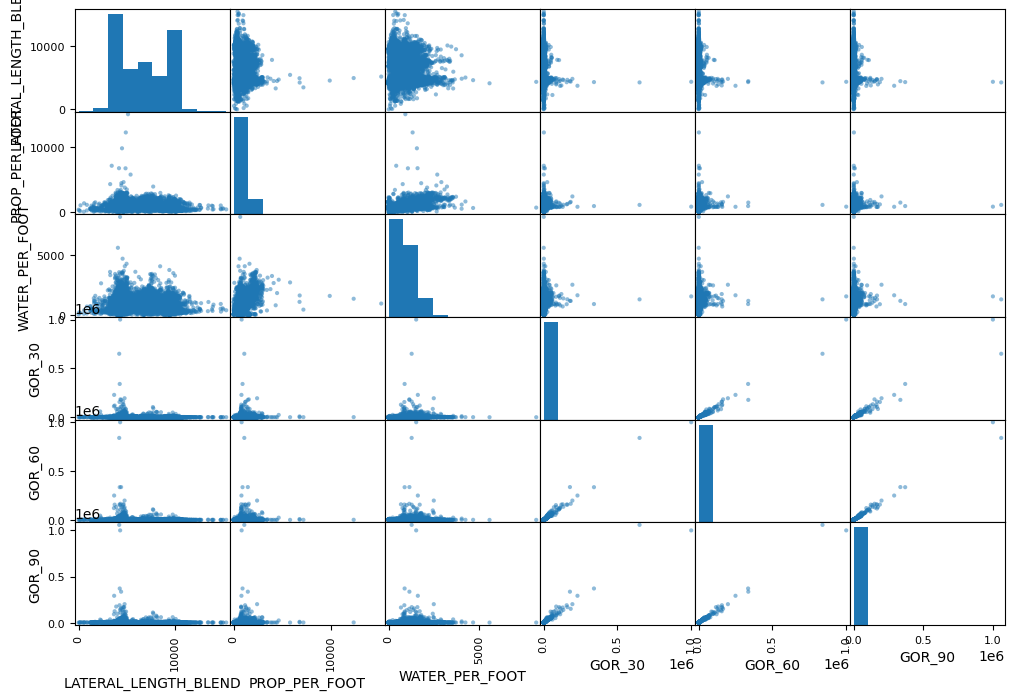

In [12]:
attributes = harmony_data.columns[1:]
scatter_matrix(harmony_data[attributes], figsize=(12, 8))
plt.xticks(rotation='horizontal')
plt.yticks(rotation='horizontal')
plt.show()

### Data Preprocessing

Data pre-processing is one of the most crucial steps for each ML lifecycle as well as the pipeline. We cannot directly input the collected data to train the model without pre-processing it, as it may generate an abrupt result.

The pre-processing step involves preparing the raw data and making it suitable for the ML model. 
The process includes different sub-steps, such as data cleaning, feature scaling, etc. The product or output of the data pre-processing step becomes the final dataset that can be used for model training and testing. There are different tools in ML for data pre-processing but for our use case, we have built a simple python module(latty) to handle all of the preprocessing steps down to feature scaling.

In [13]:
df = preprocess.preprocess_()

In [14]:
df.head(5)

,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT,GOR_30,GOR_60,GOR_90,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,3_yrs_cum_oil
API,,,,,,,,,,,
5123371740000,9056,1025.86800,790.72050,2300.919963,2290.231375,2171.635752,40.514669,-104.450319,40.51577,-104.41447,108034
5123377360000,4101,970.97405,815.32425,3786.669639,3838.096579,4012.142621,40.509280,-104.784650,40.49684,-104.78415,26741
5123378210000,4161,916.08010,839.92800,2399.490505,2291.864862,2472.275585,40.243957,-104.978518,40.24497,-104.96196,72726
5123378650100,4129,831.15310,797.53115,3907.549121,4122.576934,4553.377380,40.146702,-104.884049,40.15858,-104.88167,80123
5123380130000,4539,1032.23300,755.13430,1758.110773,1323.960532,1182.969280,40.218867,-104.469588,40.23254,-104.46965,73601


In [15]:
df.isna().any()

LATERAL_LENGTH_BLEND    False
PROP_PER_FOOT           False
WATER_PER_FOOT          False
GOR_30                  False
GOR_60                  False
GOR_90                  False
LatWGS84                False
LonWGS84                False
BottomHoleLatitude      False
BottomHoleLongitude     False
3_yrs_cum_oil           False
dtype: bool

In the preprocessing step, we have addressed the following data quality issues:
* Missing Values
* Categorical Features
* Creation of the 3 years cumulative production label

To handle the missing values, we use the Scikit-learn library in our code, which contains various libraries for building machine-learning models. Here we use the Imputer class of sklearn.preprocessing library and the pandas.interpolate method to handle the data issue.<br >

### Scaling Data

[Feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) is a crucial step in our preprocessing pipeline that is usually forgotten. we noticed a significant boost in our model's prediction after bringing every feature in our dataset to the same scale, hence we adopted this approach in our ML workflow. There are two common ways to bring different features onto the same 
scale: Normalization and Standardization. We use the Normalization approach and we apply the [MinMax](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) scaling to each feature column.

In [16]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [17]:
mc = MinMaxScaler(feature_range=(0, 1))
mc.fit(X)
X_scaled = mc.transform(X)

In [18]:
X.head(3)

,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT,GOR_30,GOR_60,GOR_90,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude
API,,,,,,,,,,
5123371740000,9056,1025.86800,790.72050,2300.919963,2290.231375,2171.635752,40.514669,-104.450319,40.51577,-104.41447
5123377360000,4101,970.97405,815.32425,3786.669639,3838.096579,4012.142621,40.509280,-104.784650,40.49684,-104.78415
5123378210000,4161,916.08010,839.92800,2399.490505,2291.864862,2472.275585,40.243957,-104.978518,40.24497,-104.96196


In [19]:
X_scaled[:3]

array([[0.58952648, 0.06777002, 0.09670316, 0.00230092, 0.00229023,
        0.00204929, 0.54119328, 0.08014246, 0.54109006, 0.08472927],
       [0.26678825, 0.06414366, 0.0997122 , 0.00378667, 0.0038381 ,
        0.00378611, 0.54090127, 0.03576771, 0.54006601, 0.03565948],
       [0.27069628, 0.0605173 , 0.10272124, 0.00239949, 0.00229186,
        0.00233299, 0.52652545, 0.01003616, 0.52644064, 0.01205772]])

### Selecting Meaningful Features

We notice that a model performs much better on the training dataset than on the test dataset, this observation is a strong indicator of overfitting. Overfitting means the model fits the parameters too closely concerning the particular observations in the training dataset, but does not generalize well to new data, and we say the model has a high variance. Here we have selected the following Features to train our machine-learning model:
* LATERAL_LENGTH_BLEND
* PROP_PER_FOOT
* WATER_PER_FOOT
* GOR_30
* GOR_60
* GOR_90
* LatWGS84
* LonWGS84
* BottomHoleLatitude
* BottomHoleLongitude

This Feature combination gave an increase in the final model's prediction over the base model by 40 percent!

In [20]:
X.columns

Index(['LATERAL_LENGTH_BLEND', 'PROP_PER_FOOT', 'WATER_PER_FOOT', 'GOR_30',
       'GOR_60', 'GOR_90', 'LatWGS84', 'LonWGS84', 'BottomHoleLatitude',
       'BottomHoleLongitude'],
      dtype='object')

### Machine Learning Model Selection

Model selection is the process of choosing one among many candidate models for a predictive modeling problem. After series of Iteration through the different classes of machine learning model available via the sci-kit learn API, we found the following algorithms to generate substantial performance on the dataset:
* GradientBoostingRegressor - Mean Absolute Error 31929
* RandomForestRegressor - Mean Absolute Error 32060.89
* Deep Neural Networks - Mean Absolute Error 43406

### Training Data & Test Data

##### What is Training Data?
Machine learning uses algorithms to learn from data in datasets. They find patterns, develop understanding, make decisions, and evaluate those decisions. 

In machine learning, datasets are split into two subsets. 

The first subset is known as the training data - it’s a portion of our actual dataset that is fed into the machine learning model to discover and learn patterns that is to train our model. we allocate about 80 percent of our dataset set for this task.

The other subset is known as the testing data. This data is used to evaluate the performance and progress of our algorithms’ training and adjust or optimize it for improved results.

Using train_test_split() from the data science library scikit-learn, we split our dataset into subsets that minimize the potential for bias in the evaluation and validation process

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,shuffle=True,random_state=42)

In [22]:
X_train[:2]

array([[0.42714779, 0.04350086, 0.07801223, 0.00521739, 0.00534735,
        0.00561088, 0.52242022, 0.01748454, 0.52337984, 0.01739503],
       [0.32169609, 0.11306577, 0.21124897, 0.00205001, 0.00206502,
        0.00200865, 0.05894922, 0.3727283 , 0.05867992, 0.37339655]])

In [23]:
len(X_train)

6259

In [24]:
X_test[:2]

array([[6.19032111e-01, 2.77335541e-02, 3.49138299e-02, 8.45089551e-04,
        8.52834090e-04, 6.50310375e-04, 9.72924486e-01, 3.22559771e-01,
        9.71934562e-01, 3.16671888e-01],
       [3.70155670e-01, 4.97031541e-02, 1.02448745e-01, 2.45723518e-03,
        2.50131849e-03, 2.36768134e-03, 5.18888341e-01, 4.20407940e-02,
        5.17904159e-01, 4.15542837e-02]])

In [25]:
len(X_test)

1565

### Model Training and Performance Evaluation

Here we feed the engineered data to a parametrized machine learning algorithm to output a model with optimal learned trainable parameters that minimize an objective function. ML algorithms are coded procedures with a set of input parameters, known as “hyperparameters”. We have customized the hyperparameters to tune the algorithm’s learning to our data set and use case.

In this process, the GradientBoostingRegressor achieved the optimal result which we showcase together with the other algorithms that performed well

#### GradientBoostingRegressor

In [26]:
gb_reg = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.08,
                          max_depth=50, max_features=0.55, max_leaf_nodes=1500,
                          min_samples_leaf=4, min_samples_split=3,
                          random_state=42)

In [27]:
gb_reg.fit(X_train,y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.08,
                          max_depth=50, max_features=0.55, max_leaf_nodes=1500,
                          min_samples_leaf=4, min_samples_split=3,
                          random_state=42)

In [28]:
pd.DataFrame(gb_reg.feature_importances_,columns=['Feature Importance'],index=X.columns)

,Feature Importance
LATERAL_LENGTH_BLEND,0.166265
PROP_PER_FOOT,0.092591
WATER_PER_FOOT,0.090356
GOR_30,0.043854
GOR_60,0.046705
GOR_90,0.043426
LatWGS84,0.166504
LonWGS84,0.096581
BottomHoleLatitude,0.124399
BottomHoleLongitude,0.129320


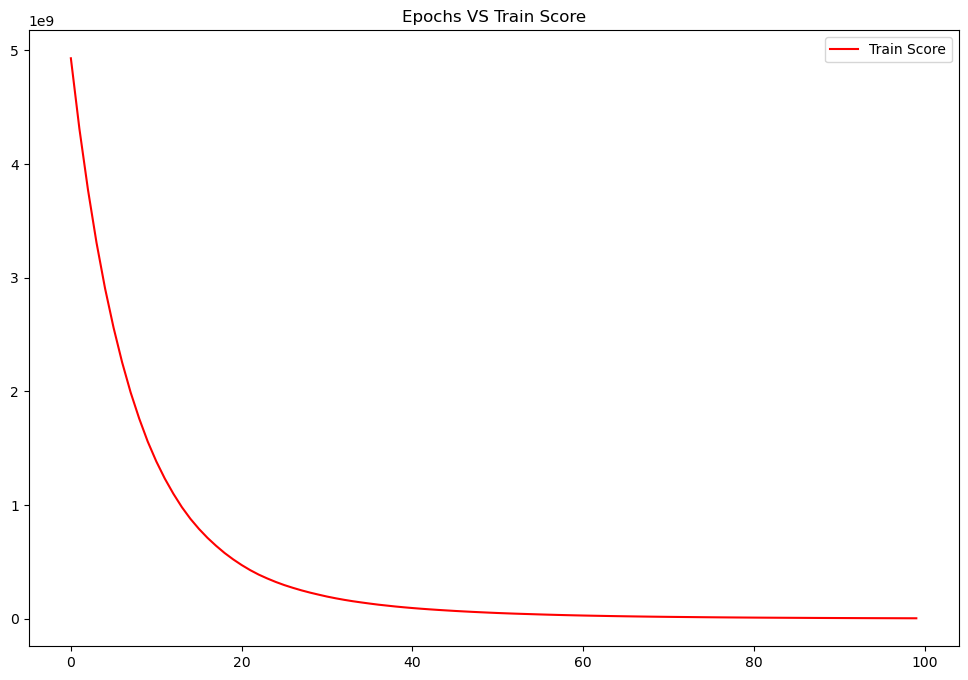

In [29]:
gb_reg.train_score_
epochs = range(100)
plt.figure(figsize=(12,8))
plt.title('Epochs VS Train Score')
plt.plot(epochs,gb_reg.train_score_,color='r',label='Train Score')
plt.legend(loc='best')
plt.show()

From the training curve we can infer that the loss decreases over time, so the model is learning

In [30]:
print("The GradientBoostingRegressor algorithm has a %.2f score on the training data." % (gb_reg.score(X_train,y_train) * 100))

The GradientBoostingRegressor algorithm has a 99.92 score on the training data.


In [31]:
preds = gb_reg.predict(X_test)
print("The GradientBoostingRegressor algorithm has a %.2f error." % (mean_absolute_error(y_test,preds)))

The GradientBoostingRegressor algorithm has a 31929.93 error.


In [32]:
print("The GradientBoostingRegressor algorithm has a %.2f score in predicting 3 years cumulative oil production from a new well data." % (gb_reg.score(X_test,y_test) * 100))

The GradientBoostingRegressor algorithm has a 62.79 score in predicting 3 years cumulative oil production from a new well data.


#### RandomForestRegressor

In [33]:
rf = RandomForestRegressor(bootstrap=False, max_depth=35, max_features=0.55,
                      max_leaf_nodes=2000, min_samples_leaf=3, n_jobs=-1,
                      random_state=42)

In [34]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=35, max_features=0.55,
                      max_leaf_nodes=2000, min_samples_leaf=3, n_jobs=-1,
                      random_state=42)

In [35]:
pd.DataFrame(rf.feature_importances_,columns=['Feature Importance'],index=X.columns)

,Feature Importance
LATERAL_LENGTH_BLEND,0.178774
PROP_PER_FOOT,0.088676
WATER_PER_FOOT,0.084173
GOR_30,0.040455
GOR_60,0.040658
GOR_90,0.042570
LatWGS84,0.161984
LonWGS84,0.114338
BottomHoleLatitude,0.120644
BottomHoleLongitude,0.127729


In [36]:
print("The RandomForestRegressor algorithm has a %.2f score on the training data." % (rf.score(X_train,y_train) * 100))

The RandomForestRegressor algorithm has a 95.20 score on the training data.


In [37]:
preds = rf.predict(X_test)
print("The RandomForestRegressor algorithm has a %.2f error." % (mean_absolute_error(y_test,preds)))

The RandomForestRegressor algorithm has a 32060.89 error.


In [38]:
print("The RandomForestRegressor algorithm has a %.2f score in predicting 3 years cumulative oil production from a new well data." % (rf.score(X_test,y_test) * 100))

The RandomForestRegressor algorithm has a 61.98 score in predicting 3 years cumulative oil production from a new well data.


### Conclusion

Prediction of cumulative oil production using Production Parameters is one of the most important works for a production engineer. The conventional way to do this is using conventional methods like DCA which have a lot of assumptions and also these assumptions are derived from some specific field, so it is possible that these are not valid for some other fields. So, if we have sufficient production data from a particular well we can derive CUMULATIVE PRODUCTION for that well by using machine learning algorithms. These correlations derived by the machine learning algorithm will help predict 1 year, 2, or 3 years of cumulative production for some new well, and also these don't have any assumptions, just PURE DATA, and STATISTICS.

The models can be improved further by doing some more Feature Engineering and Trying other algorithms like Neural Networks, etc.